<h1 style="font-size: 40px; margin-bottom: 0px;">1.2 Python data visualization (II)</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 700px;"></hr>

In 1.1, we learned how to incorporate operating system functionalities into our workflow in order to analyze our class data and started learning how to visualize our data using our TAZ KO MTT data as an example. Today, we'll continue to learn basic data visualization while also reinforcing our skills in data processing using pandas DataFrames. We will use a slightly more complex dataset, specifically the CDC COVID-19 cases data, which contains not just quantitative values but also qualitative information as well. This will give us the opportunity to learn how to filter our data and generate line plots. Then we will use this plot as an example to fine tune formatting, styling, and exporting our plots.

We'll then finish by learning how to generate slightly more complex visualizations by layering multiple plots together to create publication-quality figures.

<strong>Learning objectives:</strong>
<ul>
    <li>Continue to practice working with DataFrames</li>
    <li>Learn how to filter a dataset</li>
    <li>Continue practicing plotting</li>
    <li>Learn how to fine tune visualizations</li>
    <li>Learn how to export plots</li>
</ul>

<h2>Import Packages</h2>

<ul>
    <li><code>numpy</code></li>
    <li><code>pandas</code></li>
    <li><code>matplotlib.pyplot</code></li>
    <li><code>matplotlib.dates</code> - to allow us to plot dates more easily</li>
    <li><code>seaborn</code> - to fine tune visualizations</li>
    <li><code>os</code></li>
</ul>

In [1]:
#Import the packages that we'll use today
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os

<h1 style="font-size: 40px; margin-bottom: 0px;">More DataFrames practice</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

To start today's lesson, let's import the data that we'll use for this part of today's lesson. We'll be importing the <code>cdc_covid_cases.csv</code> file <a href="https://data.cdc.gov/Case-Surveillance/Weekly-United-States-COVID-19-Cases-and-Deaths-by-/pwn4-m3yp/about_data" rel="noopener noreferrer"><u>available from the CDC</u></a>. The .csv file should have been pulled into your server along with today's notebook under the file path <code>~/MCB201B_F2025/Week_1/data/cdc_covid/cdc_covid_cases.csv</code>.

Let's go ahead and import the dataset into this notebook.

In [2]:
os.getcwd()

'/home/jovyan/MCB201B_F2025/Week_1'

In [3]:
os.chdir('./cdc_covid/')

In [4]:
cdc_covid_cases = pd.read_csv('cdc_covid_cases.csv')

In [ ]:
cdc_covid_cases.style

Let's do a sanity check to see if it imported correctly. Note that this dataset is quite large with over 10,000 rows and 10 columns, so if you use the <code>.style</code> attribute, you will output the <u>entire</u> dataset as a stylized table. Recall from MCB201A that DataFrames have a <code>head</code> and <code>tail</code> attribute. 

So for this sanity check, let's just take a look at the first 5 rows as a stylized table.

In [6]:
cdc_covid_cases.head().style

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
0,01/23/2020,AK,01/16/2020,01/22/2020,0,0,0,0,0,0
1,01/30/2020,AK,01/23/2020,01/29/2020,0,0,0,0,0,0
2,02/06/2020,AK,01/30/2020,02/05/2020,0,0,0,0,0,0
3,02/13/2020,AK,02/06/2020,02/12/2020,0,0,0,0,0,0
4,02/20/2020,AK,02/13/2020,02/19/2020,0,0,0,0,0,0


<h2 style="font-size: 32px;">Convert to dates to datetime data type</h2>

As you can see in the dataset that we've imported, we have qualitative information, quantitative case numbers, and dates as well. Let's take a look at the dates and how Python is understanding them.

In [7]:
cdc_covid_cases['start_date'][1]

'01/23/2020'

In [8]:
type(cdc_covid_cases['start_date'][1])

str

What you can see is that Python is interpreting it as a string, so while we know that there's temporal information associated with all the values in each of the dates columns, Python does not. It is simply understanding it and interpreting it as a string of characters without any temporal information associated with it.

So what we can do is to tell Python that the values within the dates columns have temporal information in them by using the <code>pd.to_datetime()</code> function. <a href="https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html" rel="noopener noreferrer"><u>Documentation for <code>pd.to_datetime()</code> can be found here.</u></a>

In [9]:
cdc_covid_cases['start_date'] = pd.to_datetime(cdc_covid_cases['start_date'])
cdc_covid_cases['end_date'] = pd.to_datetime(cdc_covid_cases['end_date'])

In [10]:
type(cdc_covid_cases['start_date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [11]:
for col in cdc_covid_cases.columns:
    if 'date' in col:
        cdc_covid_cases[col] = pd.to_datetime(cdc_covid_cases[col])
    else:
        pass

In [12]:
cdc_covid_cases.head()

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
0,2020-01-23,AK,2020-01-16,2020-01-22,0,0,0,0,0,0
1,2020-01-30,AK,2020-01-23,2020-01-29,0,0,0,0,0,0
2,2020-02-06,AK,2020-01-30,2020-02-05,0,0,0,0,0,0
3,2020-02-13,AK,2020-02-06,2020-02-12,0,0,0,0,0,0
4,2020-02-20,AK,2020-02-13,2020-02-19,0,0,0,0,0,0


<h2 style="font-size: 32px;">Filtering DataFrames</h2>

Recall from the above example when we pulled the dates and from earlier lessons that we can make use of dictionary notation and slice notation to retrieve information from our DataFrame. Let's do a quick practice here.

In [13]:
cdc_covid_cases[100:1000]

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
100,2021-12-23,AK,2021-12-16,2021-12-22,150283,1046,972,87,0,0
101,2021-12-30,AK,2021-12-23,2021-12-29,152363,2080,974,2,0,0
102,2022-01-06,AK,2021-12-30,2022-01-05,157886,5523,975,1,0,0
103,2022-01-13,AK,2022-01-06,2022-01-12,170052,12166,981,6,0,0
104,2022-01-20,AK,2022-01-13,2022-01-19,185787,15735,1047,66,0,0
...,...,...,...,...,...,...,...,...,...,...
995,2022-07-21,CA,2022-07-14,2022-07-20,10495155,149725,92290,237,0,0
996,2022-07-28,CA,2022-07-21,2022-07-27,10632003,136848,92591,301,0,0
997,2022-08-04,CA,2022-07-28,2022-08-03,10748851,116848,92883,292,0,0
998,2022-08-11,CA,2022-08-04,2022-08-10,10844550,95699,93175,292,0,0


While specifically calling up a known set of columns and rows can be helpful, you will probably find yourself in instances where you may not easily know the exact row or column that you want to retrieve, only what subset of data you're interested in. For example, since we're in California, let's say we're most interested in the cases relating to California.

First let's identify what column we'll need to use to filter our data.

In [14]:
cdc_covid_cases['state']

0        AK
1        AK
2        AK
3        AK
4        AK
         ..
10375    WY
10376    WY
10377    WY
10378    WY
10379    WY
Name: state, Length: 10380, dtype: object

Then, how do we know which values relate to California? In other words, how do we set up a conditional statement to identify the California portion of the dataset?

In [15]:
cdc_covid_cases['state'] == 'CA'

0        False
1        False
2        False
3        False
4        False
         ...  
10375    False
10376    False
10377    False
10378    False
10379    False
Name: state, Length: 10380, dtype: bool

Now we have identified the portion of the dataset in the <code>'state'</code> column that relates to California's COVID data. We can now use this output combined with <code>.loc[]</code> to filter our dataset to just focus on California's cases.

In [16]:
covid_ca = cdc_covid_cases.loc[cdc_covid_cases['state'] == 'CA']

Now let's take a look at just the first five rows to see how the filtering went.

In [17]:
covid_ca.head()

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
865,2020-01-23,CA,2020-01-16,2020-01-22,0,0,0,0,0,0
866,2020-01-30,CA,2020-01-23,2020-01-29,2,2,0,0,0,0
867,2020-02-06,CA,2020-01-30,2020-02-05,8,6,0,0,0,0
868,2020-02-13,CA,2020-02-06,2020-02-12,16,8,0,0,0,0
869,2020-02-20,CA,2020-02-13,2020-02-19,30,14,0,0,0,0


What if we're particularly interested in the case numbers for California between June 1, 2021 and September 1, 2021? How could we use our filtered dataset to then look at this specific window of time?

In [18]:
covid_ca['start_date'] > pd.to_datetime('06/01/2021')

865     False
866     False
867     False
868     False
869     False
        ...  
1033     True
1034     True
1035     True
1036     True
1037     True
Name: start_date, Length: 173, dtype: bool

In [19]:
covid_ca['start_date'] < pd.to_datetime('09/01/2021')

865      True
866      True
867      True
868      True
869      True
        ...  
1033    False
1034    False
1035    False
1036    False
1037    False
Name: start_date, Length: 173, dtype: bool

In [20]:
(covid_ca['start_date'] > pd.to_datetime('06/01/2021')) & (covid_ca['start_date'] < pd.to_datetime('09/01/2021'))

865     False
866     False
867     False
868     False
869     False
        ...  
1033    False
1034    False
1035    False
1036    False
1037    False
Name: start_date, Length: 173, dtype: bool

In [21]:
covid_ca.loc[(covid_ca['start_date'] > pd.to_datetime('06/01/2021')) & 
    (covid_ca['start_date'] < pd.to_datetime('09/01/2021'))]

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
937,2021-06-10,CA,2021-06-03,2021-06-09,3853677,6655,62039,309,0,0
938,2021-06-17,CA,2021-06-10,2021-06-16,3859768,6091,62169,130,0,0
939,2021-06-24,CA,2021-06-17,2021-06-23,3866342,6574,62384,215,0,0
940,2021-07-01,CA,2021-06-24,2021-06-30,3875227,8885,62685,301,0,0
941,2021-07-08,CA,2021-07-01,2021-07-07,3886793,11566,62917,232,0,0
942,2021-07-15,CA,2021-07-08,2021-07-14,3908447,21654,63168,251,0,0
943,2021-07-22,CA,2021-07-15,2021-07-21,3944648,36201,63339,171,0,0
944,2021-07-29,CA,2021-07-22,2021-07-28,3998313,53665,63516,177,0,0
945,2021-08-05,CA,2021-07-29,2021-08-04,4070342,72029,63729,213,0,0
946,2021-08-12,CA,2021-08-05,2021-08-11,4156032,85690,63975,246,0,0


<h1 style="font-size: 40px; margin-bottom: 0px;">More plotting practice</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

In 1-1, we used our class MTT data to generate a simple bar plot comparing the relative absorbance between our control and TAZ KO cells. Today, we'll continue to practice more plotting using our filtered CDC dataset to plot the number of new cases over the full period of time covered by this dataset.

So we'll use the <code>plt.plot()</code> function to output a line plot of case numbers. <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html" rel="noopener noreferrer"><u>Documentation for <code>plt.plot()</code> can be found here.</u></a>

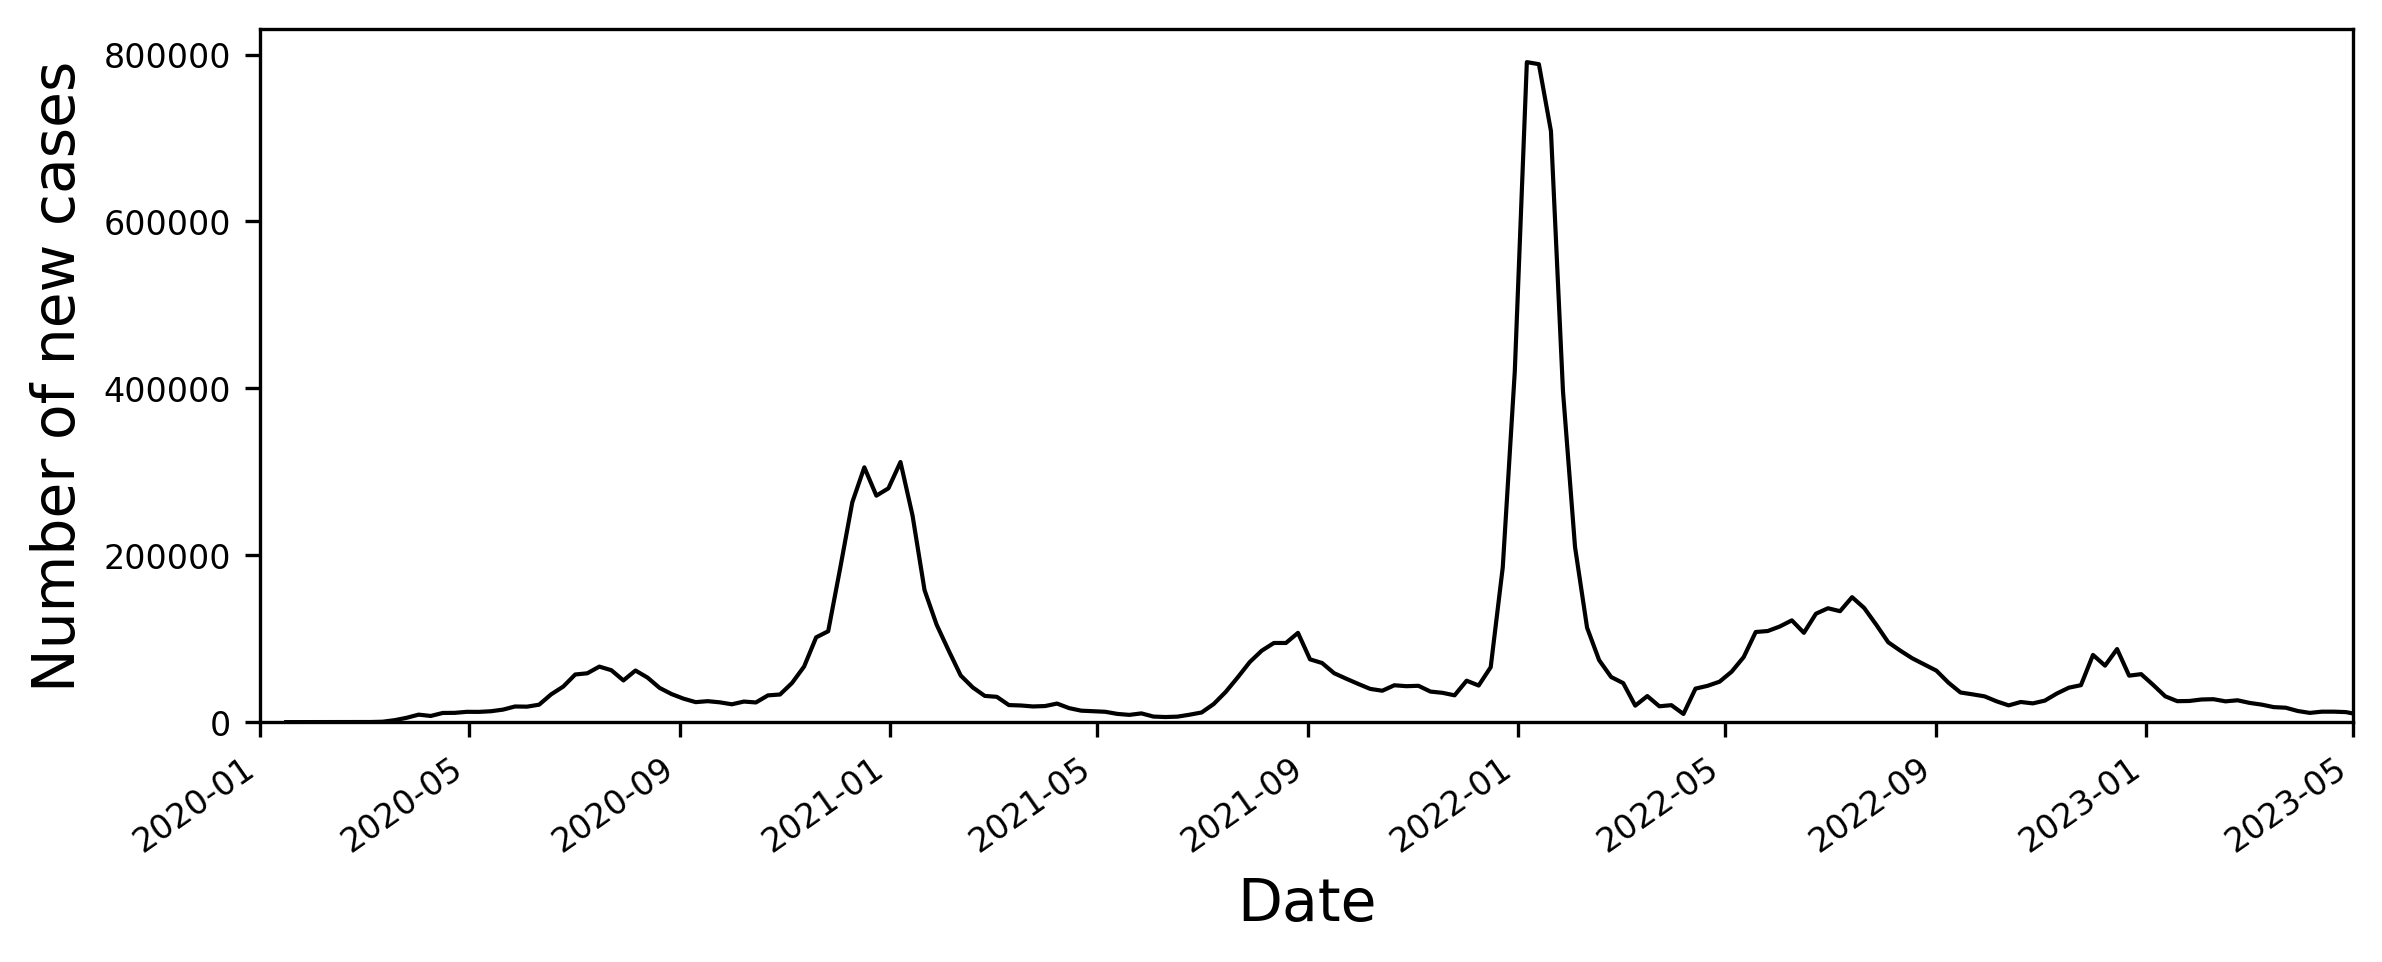

In [22]:
#set up our figure in the usual way
fig, ax = plt.subplots()

plt.plot(covid_ca['start_date'], #this is the x values
         covid_ca['new_cases'], #this is the y values
         color='k', #this is to set the color of your lines
         lw=1 #this is to set the line width
        )

#let's make some quick modifications to our plot
ax.set_xlabel('Date',
             size=14)
ax.set_ylabel('Number of new cases',
             size=14)

#Update some additional things about our plot
plt.xticks(rotation=35,
           ha='right',
           size=8
          )
plt.yticks(size=8)

#Update our x and y limits
ax.set_xlim(pd.to_datetime('01/01/2020'), pd.to_datetime('05/01/2023'))
ax.set_ylim(0)

fig.set_size_inches(9,3) #changes the size of the figure
fig.set_dpi(300) #updates the resolution

plt.show()

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #1: Filter for Florida's and New York's data</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 950px;"></hr>

For this exercise, see if you can filter the original full COVID dataset to obtain Florida's and New York's data and assign each state to its own variable.

In [23]:
covid_fl = cdc_covid_cases.loc[cdc_covid_cases['state'] == 'FL']
covid_ny = cdc_covid_cases.loc[cdc_covid_cases['state'] == 'NY']

<h1 style="font-size: 40px; margin-bottom: 0px;">Exercise #2: Plot new deaths for CA, NY, and FL</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 950px;"></hr>

For this exercise, plot the number of new deaths for CA, NY, and FL all on the same plot. To do this, you'll use <code>plt.subplots()</code> to set up your plots the way we've been doing so far. Now, instead of a single <code>plt.plot()</code> you can have multiple <code>plt.plot()</code> blocks of code one after the other, and they'll be plotted onto the same plot.

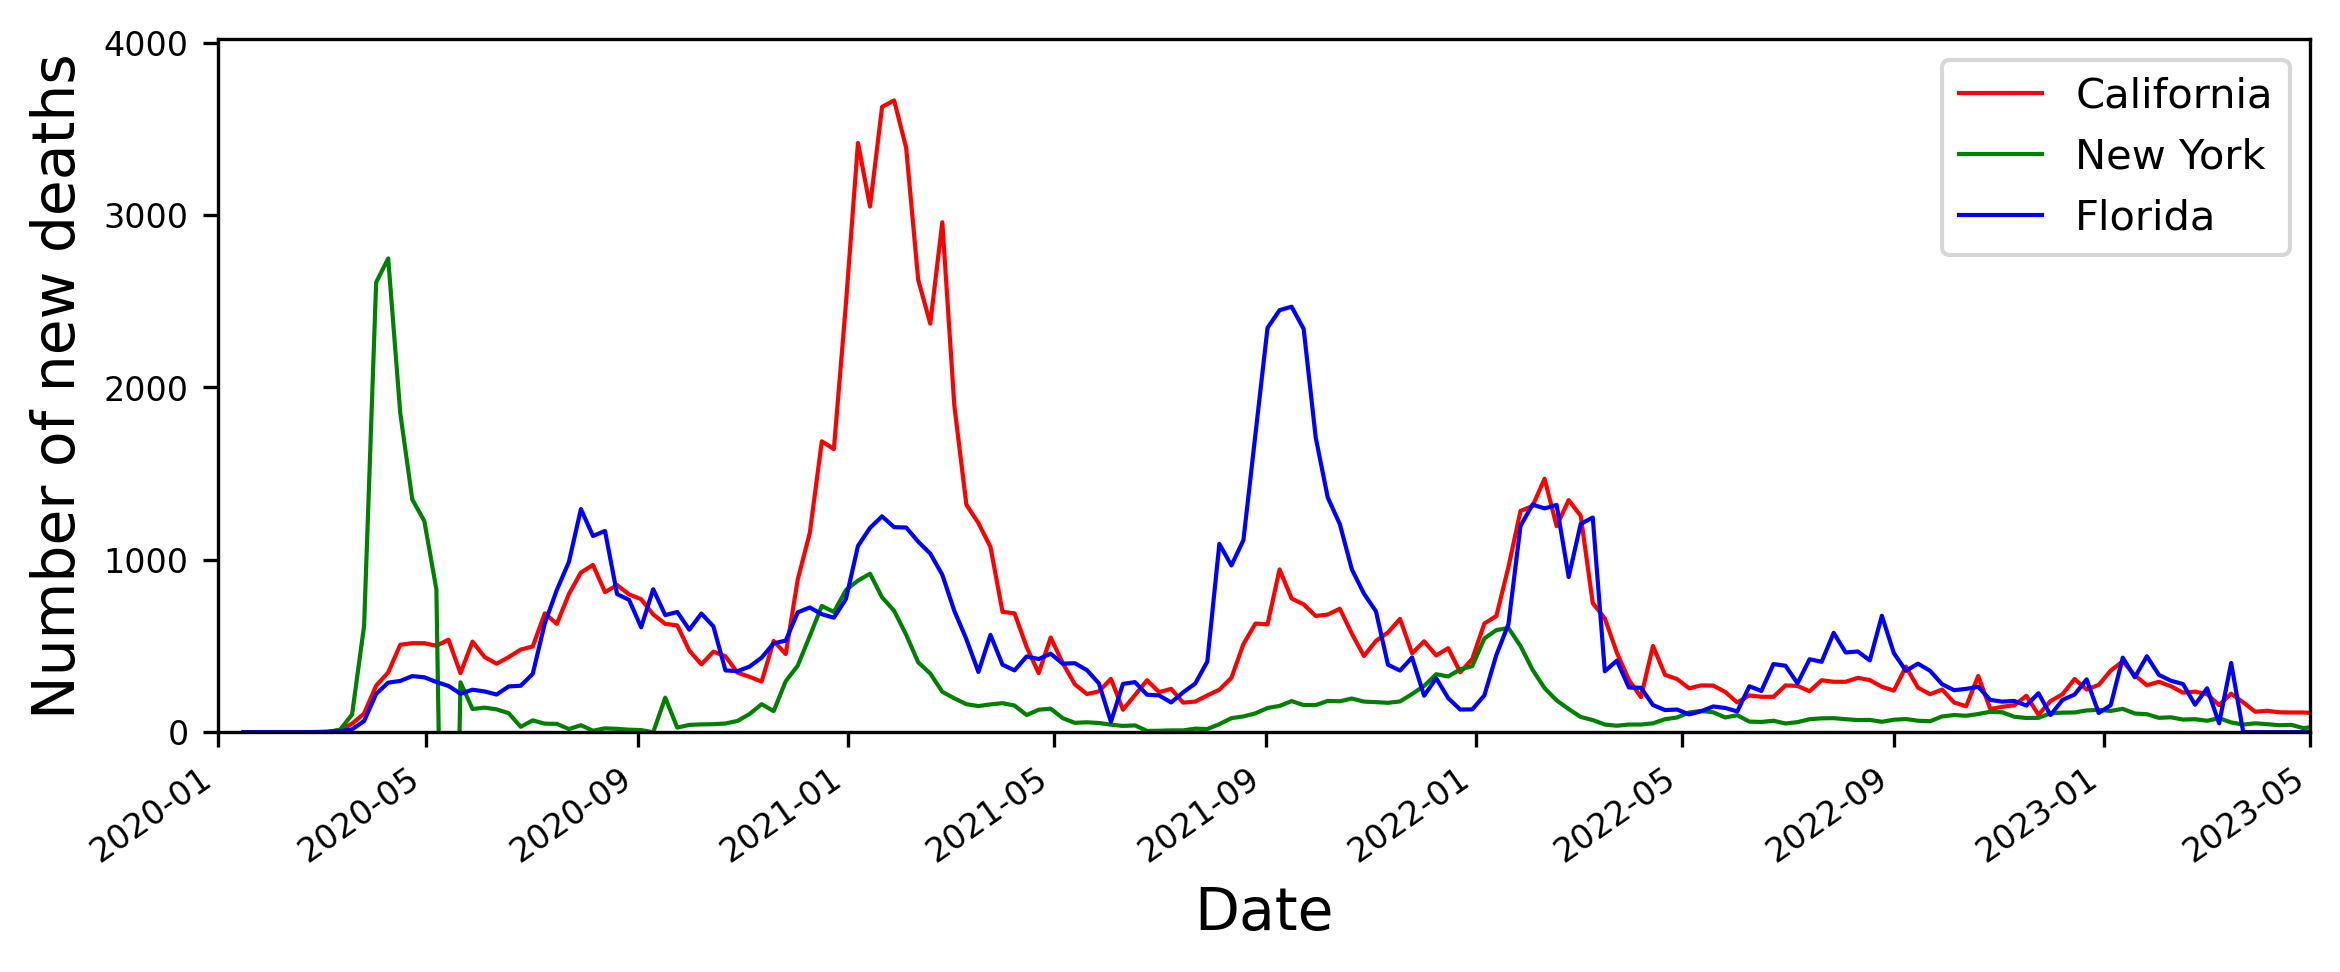

In [24]:
fig, ax = plt.subplots()

plt.plot(covid_ca['start_date'], #this is the x values
         covid_ca['new_deaths'], #this is the y values
         color='r', #this is to set the color of your lines
         lw=1, #this is to set the line width
         label='California' #adding a label to our line
        )

plt.plot(covid_ny['start_date'], #this is the x values
         covid_ny['new_deaths'], #this is the y values
         color='g', #this is to set the color of your lines
         lw=1, #this is to set the line width
         label='New York' #adding a label to our line
        )

plt.plot(covid_fl['start_date'], #this is the x values
         covid_fl['new_deaths'], #this is the y values
         color='b', #this is to set the color of your lines
         lw=1, #this is to set the line width
         label='Florida' #adding a label to our line
        )

#let's make some quick modifications to our plot
ax.set_xlabel('Date',
             size=14)
ax.set_ylabel('Number of new deaths',
             size=14)

#Update some additional things about our plot
plt.xticks(rotation=35,
           ha='right',
           size=8
          )
plt.yticks(size=8)

#to show our legend
ax.legend() 

#Update our x and y limits
ax.set_xlim(pd.to_datetime('01/01/2020'), pd.to_datetime('05/01/2023'))
ax.set_ylim(0)

fig.set_size_inches(9,3) #changes the size of the figure
fig.set_dpi(300) #updates the resolution

plt.show()

We can take a quick break here, and then when we reconvene, we'll go over the first two exercises, and proceed with the rest of today's notebook.

<h1 style="font-size: 40px; margin-bottom: 0px;">Exporting your plots</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 550px;"></hr>

Now that you have a nice plot, you can export it as a PDF using <code>fig.savefig()</code>. <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.savefig.html#matplotlib.figure.Figure.savefig" rel="noopener noreferrer"><u>Documentation for <code>fig.savefig()</code> can be found here.</u></a>

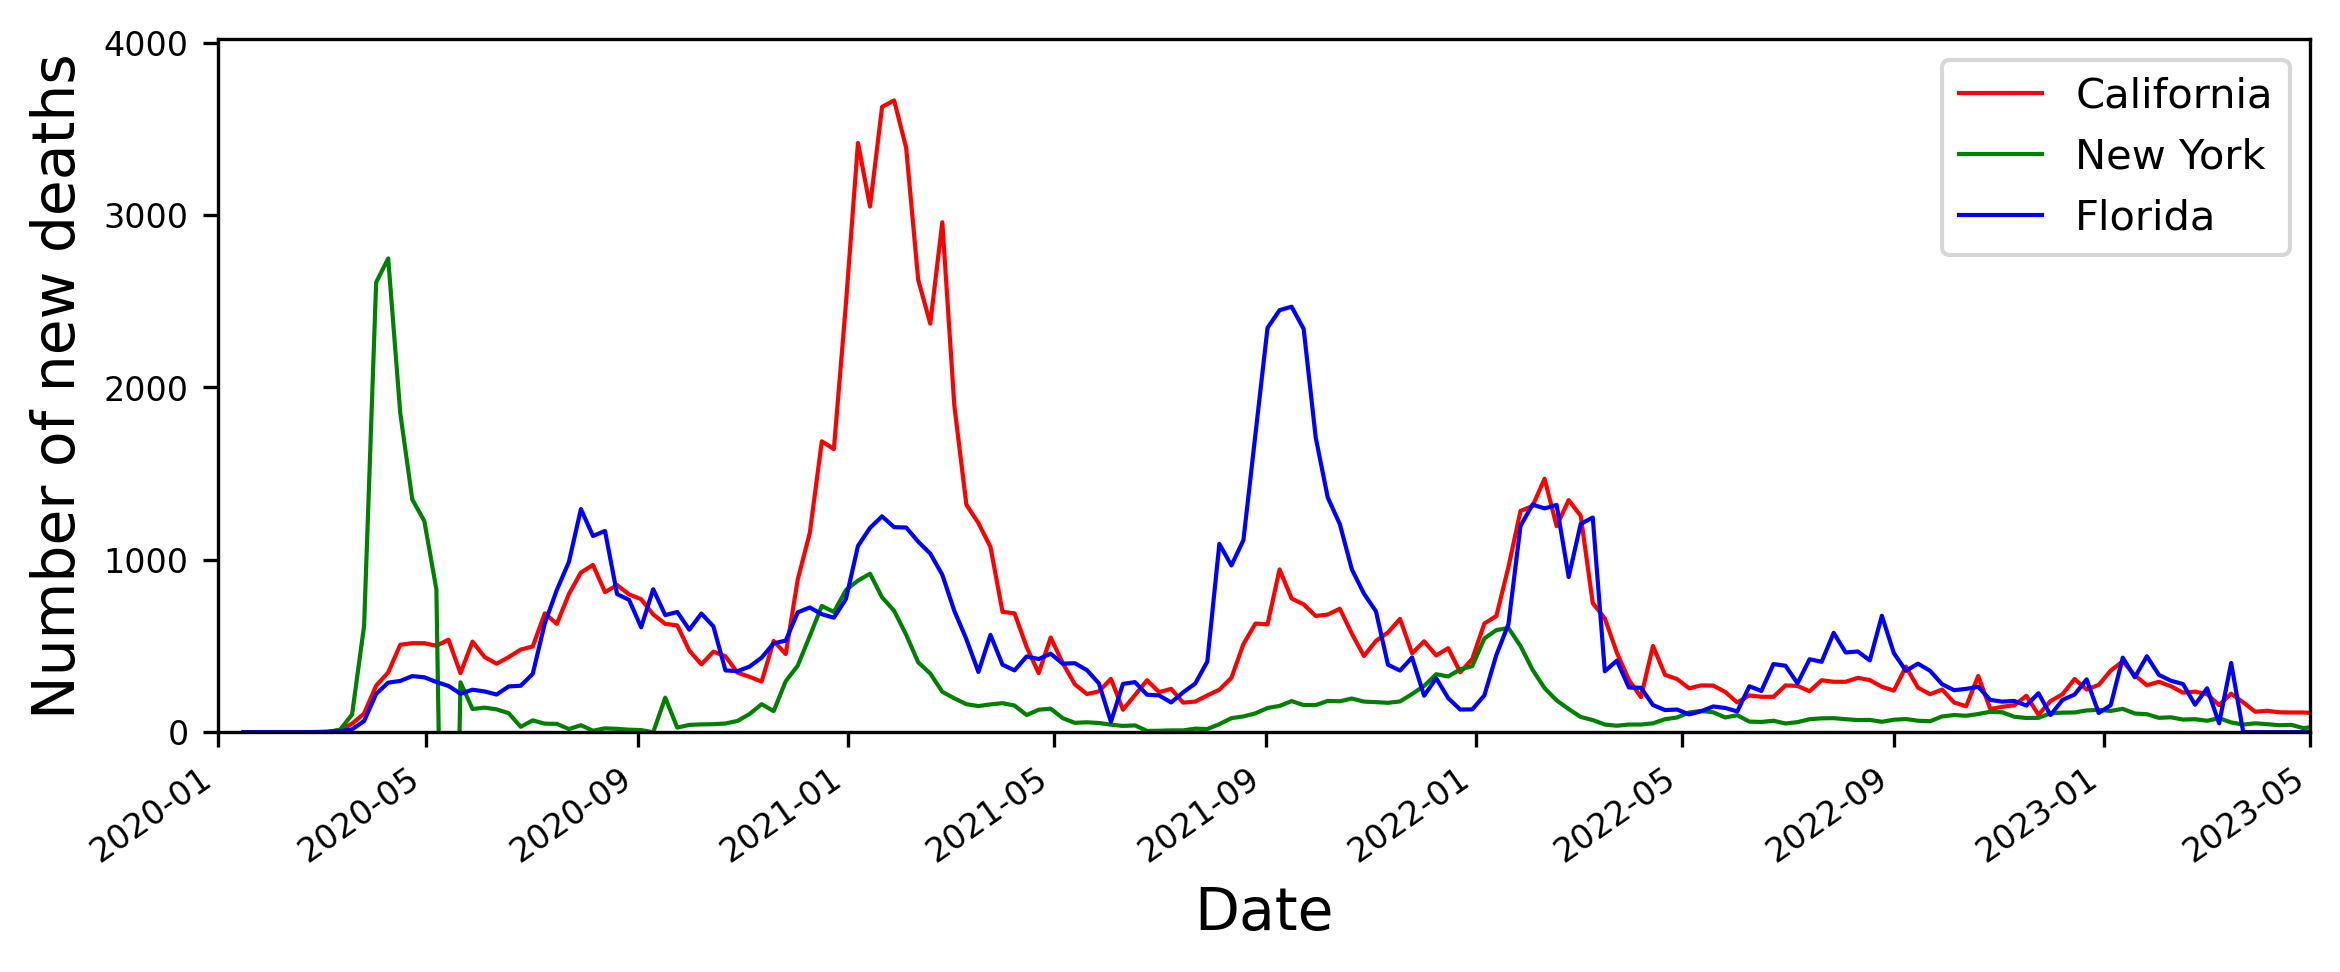

In [25]:
fig, ax = plt.subplots()

plt.plot(covid_ca['start_date'], #this is the x values
         covid_ca['new_deaths'], #this is the y values
         color='r', #this is to set the color of your lines
         lw=1, #this is to set the line width
         label='California' #adding a label to our line
        )

plt.plot(covid_ny['start_date'], #this is the x values
         covid_ny['new_deaths'], #this is the y values
         color='g', #this is to set the color of your lines
         lw=1, #this is to set the line width
         label='New York' #adding a label to our line
        )

plt.plot(covid_fl['start_date'], #this is the x values
         covid_fl['new_deaths'], #this is the y values
         color='b', #this is to set the color of your lines
         lw=1, #this is to set the line width
         label='Florida' #adding a label to our line
        )

#let's make some quick modifications to our plot
ax.set_xlabel('Date',
             size=14)
ax.set_ylabel('Number of new deaths',
             size=14)

#Update some additional things about our plot
plt.xticks(rotation=35,
           ha='right',
           size=8
          )
plt.yticks(size=8)

#to show our legend
ax.legend() 

#Update our x and y limits
ax.set_xlim(pd.to_datetime('01/01/2020'), pd.to_datetime('05/01/2023'))
ax.set_ylim(0)

fig.set_size_inches(9,3) #changes the size of the figure
fig.set_dpi(300) #updates the resolution

plt.show()

fig.savefig('../figures/cdc_covid_plot.pdf', bbox_inches='tight')

You should see now that in the <code>figure</code> subdirectory, your line plot exported as a PDF file. Later in 4-2 Making publication quality figures, you'll learn how to make publication quality figures, and why it's helpful to export all your plots as a PDF. 

In [26]:
os.getcwd()

'/home/jovyan/MCB201B_F2025/Week_1/cdc_covid'

<h1 style="font-size: 40px; margin-bottom: 0px;">Swarmplots with error bars</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 550px;"></hr>

A common way of displaying data with multiple biological replicates is a swarm plot with each dot representing individual replicates, and then adding error bars on top of the swarmplot. For this part of today's notebook, we'll make use of <code>seaborn</code>, which is built on the <code>matplotlib</code> package.

Let's make use of 1-1's code and import our processed class MTT data in this notebook.

In [51]:
mtt_data = pd.read_csv('/home/jovyan/MCB201B_F2025/Week_1/data/class_mtt_data.csv')

As usual, let's do a quick sanity check to see how the data imported.

In [28]:
mtt_data.style

,control,tazko
0,0.852458,0.504785
1,0.819008,0.854697
2,1.389640,0.723924
3,0.983758,0.392318
4,1.102809,0.694030
5,0.852327,0.497278


Now let's learn how to plot a swarmplot using <code>seaborn</code>. We'll learn how to do this piece by piece, breaking down the individual steps to set up a slightly more complex plot.

<h2>Set up our figure for fine tuning</h2>

Like with our COVID plots, we will set up our figure in the usual method, so we can fine tune the formatting and style as well as layer multiple plots on top of one another.

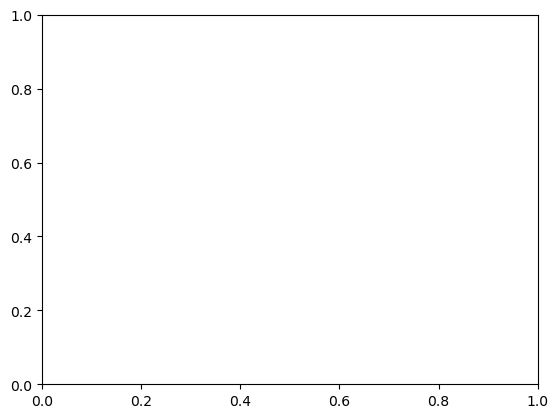

In [29]:
fig, ax = plt.subplots()

Running that alone, you should just see an empty plot.

<h2>Prepare a color palette</h2>

As with our line plot, we can adjust the coloring, and here, we'll set up a color palette using hexcode to pick specific colors.

In [30]:
dot_colors = ['#777777', '#E64B35']

<h2>Plot a swarmplot</h2>

Matplotlib's ability to create a swarmplot is a bit more limited, so we can make use of <code>seaborn</code>, which has a function for us to create a swarmplot. Swarmplots are helpful when you want to show each individual data point, so that the reader has an idea of how the distribution of your data looks by looking directly at the raw data points.

The function that we'll use is the <code>sns.swarmplot()</code> function. <u><a href="https://seaborn.pydata.org/generated/seaborn.swarmplot.html" rel="noopener noreferrer" target="_blank">Documentation for <code>sns.swarmplot()</code> can be found here.</a></u>

We'll pass our DataFrame to the function to see how it looks like without additional modifications.

<Axes: >

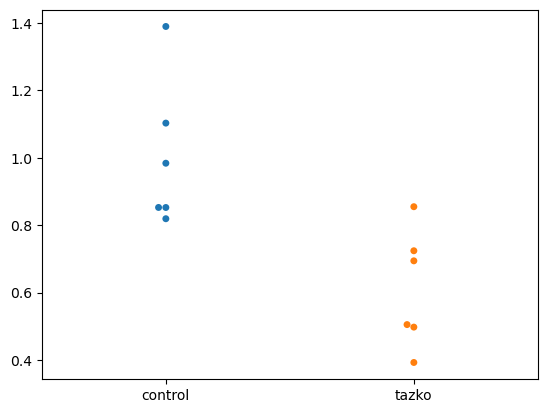

In [31]:
fig, ax = plt.subplots()

sns.swarmplot(data=mtt_data)

We can make minor adjustments by passing additional arguments to the function, such as:
<ul>
    <li><code>s</code> - the size of our markers</li>
    <li><code>palette</code> - color palette for our markers</li>
</ul>

<Axes: >

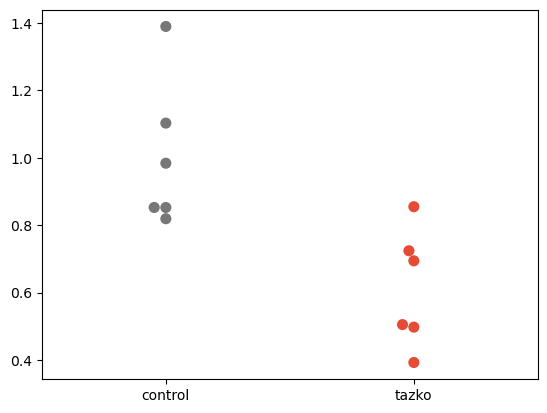

In [32]:
fig, ax = plt.subplots()

sns.swarmplot(data=mtt_data,
              s=8,
              palette=dot_colors
             )

You can see that we have the basic swarm plot, but like with our other plots, there's still a few things missing, such as properly formatted labels for our groups on the X-axis, a Y-axis label, and proper Y-axis limits. Usually, swarmplots also include descriptive statistics that summarize the raw data that is shown, and this can include the mean and error bars denoting the standard deviation or standard error.

Before we start adjusting the axes, let's add in our descriptive statistics overlaid on top of our raw data points.

<h2>Overlay descriptive statistics</h2>

One thing we can do is to overlay plots on top of one another to convey additional information within a single plot without having to create subplots for each thing. This type of approach is helpful when we want to overlay descriptive statistics over our raw data points, so that the reader can see both the raw data as well as the statistics.

Descriptive statistics, such as the mean, can be plotted a few ways, such as a bar graph with error bars or as box-and-whisker plots. Both of these plots contain something that will be helpful to overlay onto our swarmplot. For the bar graph, it contains error bars, and for the box-and-whisker plot, it contains the ability to plot just the mean.

So what we can do is to take the portions of these plots that we like, strip away what we don't want to see, and overlay it onto our swarmplot.

Let's take a look at how these two plots will look like when plotted as a basic function.

<h3>Plot a bar graph to overlay</h3>

We can make use of the <code>sns.barplot()</code> function and pass our MTT data to the function to generate a bar plot kind of like what we did using <code>matplotlib.pyplot</code>. <a href="https://seaborn.pydata.org/generated/seaborn.barplot.html" rel="noopener noreferrer"><u>Documentation for <code>sns.barplot()</code> can be found here.</u></a>

<Axes: >

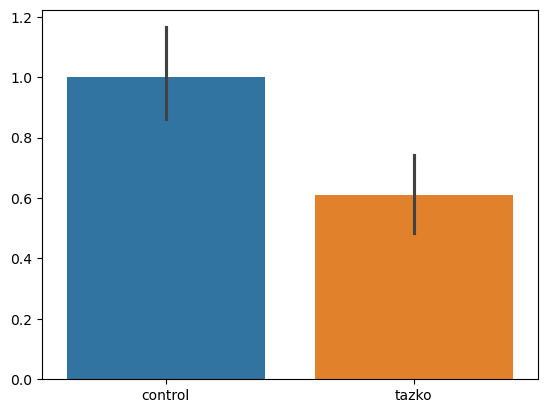

In [33]:
sns.barplot(data=mtt_data)

You should see a pretty basic bar graph with error bars already plotted. It has what we need, but now we need to strip out the parts that we don't by passing additional arguments through it.

Specifically, we want just the error bars, so we can make use of the following parameters:
<ul>
    <li><code>data</code> - we pass our DataFrame to this parameter so it can perform the calculations needed to plot the error bars</li>
    <li><code>estimator</code> - we want it to plot the mean since we want our error bars to be centered around the mean of our data. We can pass the <code>np.mean</code> function to this parameter</li>
    <li><code>alpha</code> - the parameter controlling the opacity of the boxplot bars. By changing this to <code>0</code>, we basically hide the bars depicting the mean, leaving only the error bars visisble</li>
    <li><code>errorbar</code> - by changing this parameter, we can tell Python if we want our error bars to denote standard deviation or standard error</li>
    <li><code>capsize</code> - the horizontal length of our error bars. This also tells Python that we want a horizontal cap (compare to previously, where there was no cap)</li>
    <li><code>err_kws</code> - we can pass a dictionary containing key:value pairs to this parameter to further fine tune our plot by mapping the key:value pairs we provide to specific parameters that exist for <code>plt.boxplot()</code>. <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html#matplotlib.axes.Axes.boxplot" rel="noopener noreferrer" target="_blank"><u>Documentation is here.</u></a></li>
</ul>

So let's work through each parameter one at a time to see how each change alters our bar plot.

<h3>Define the estimator</h3>

<Axes: >

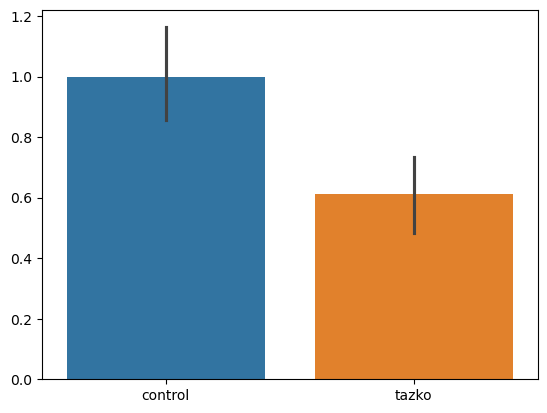

In [34]:
sns.barplot(data=mtt_data,
            estimator=np.mean
           )

You can see nothing is changed because <code>seaborn.barplot()</code> will plot the mean by default.

<h3>Change the plot opacity to hide the bars (so we only see error bars)</h3>

<Axes: >

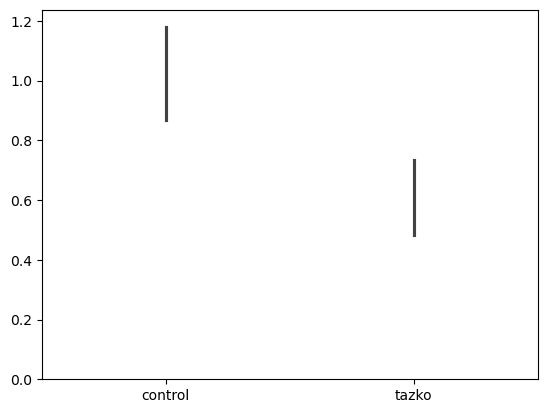

In [35]:
sns.barplot(data=mtt_data,
            estimator=np.mean,
            alpha=0
           )

The only things showing now are the error bars, and the error bars need further refining so that we have them denote either the standard deviation or the standard error.

<h3>Update what the error bars denote</h3>

<Axes: >

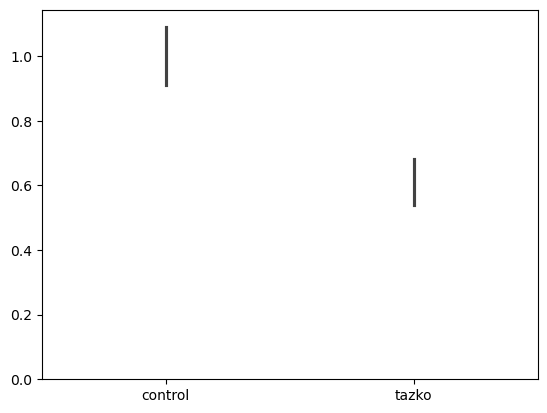

In [36]:
sns.barplot(data=mtt_data,
            estimator=np.mean,
            alpha=0,
            errorbar='se'
           )

<h3>Add caps to error bars</h3>

<Axes: >

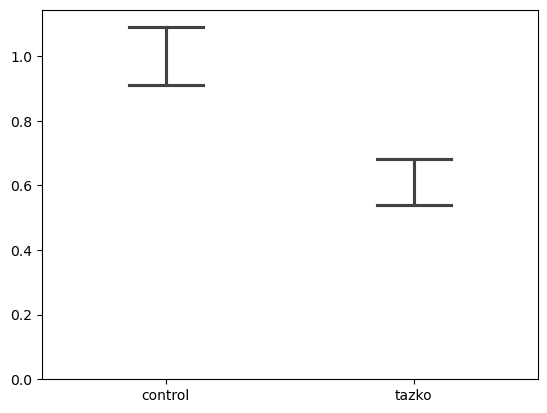

In [37]:
sns.barplot(data=mtt_data,
            estimator=np.mean,
            alpha=0,
            errorbar='se',
            capsize=0.3
           )

<h3>Further refine error bars</h3>

<Axes: >

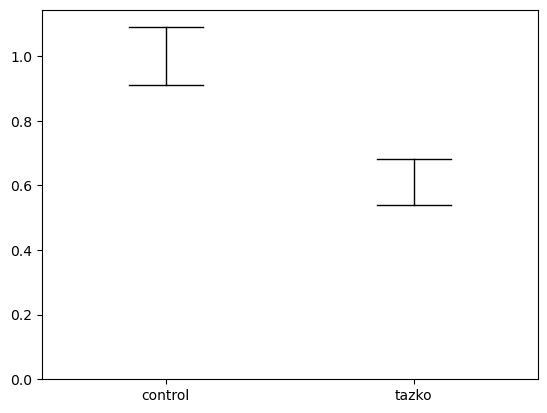

In [38]:
sns.barplot(data=mtt_data,
            estimator=np.mean,
            alpha=0,
            errorbar='se',
            capsize=0.3,
            err_kws={'linewidth': 1,
                     'color': 'k'}
           )

So now our error bars look good, and let's use the box-and-whisker plot to get a horizontal line denoting the means of our data.

<h3>Plot a box-and-whisker plot to overlay</h3>

We'll similarly decompose a box-and-whisker plot to get it to just show a horizontal line for our means.

We can use the <code>sns.boxplot()</code> function and pass our same DataFrame to it to generate a box-and-whisker plot.

<a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html" rel="noopener noreferrer" target="_blank"><u>Documentation for <code>sns.boxplot()</code> can be found here.</u></a>

<Axes: >

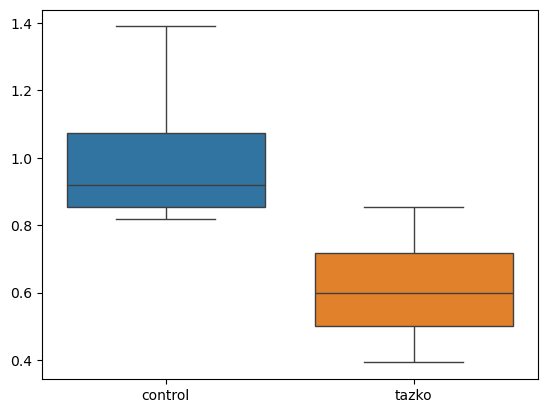

In [39]:
sns.boxplot(data=mtt_data)

Here, you should see a basic box-and-whisker plot. We're going to make adjustments to the plot so that it shows just the mean, so we can use it as an overlay on top of our swarmplot.

Like with our bar plot, we can make use of the following parameters to just get what we need the plot to depict:
<ul>
    <li><code>data</code> - we pass our DataFrame to this parameter so it can perform the calculations needed to plot the error bars</li>
    <li><code>showmeans</code> - we want it to plot the mean</li>
    <li><code>meanline</code> - we want it to plot a horizontal line for the mean that spans the width of the box of our box-and-whisker plot</li>
    <li><code>width</code> - defines the width of our box and therefore also defines the horizontal span of our mean line</li>
    <li><code>meanprops</code> - we can pass a dictionary containing key:value pairs to this parameter to refine how we want the mean line to look. Like with <code>err_kws</code> for the bar plot, the key:value pairs will be passed to <code>plt.boxplot()</code>. <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html#matplotlib.axes.Axes.boxplot" rel="noopener noreferrer" target="_blank"><u>Documentation is here.</u></a></li>
    <li><code>medianprops</code> - we can pass a dictionary containing key:value pairs to this parameter to remove the median line of our box-and-whisker plot. Works like the <code>meanprops</code> parameter</li>
    <li><code>whiskerprops</code> - we can pass a dictionary containing key:value pairs to this parameter to remove the whiskers of our box-and-whisker plot. Also works like the <code>meanprops</code> parameter</li>
    <li><code>showfliers</code> - we can indicate with a Boolean, whether or not we want to hide outliers (fliers)</li>
    <li><code>showbox</code> - we can indicate with a Boolean, whether or not we want to hide the box of our box-and-whisker plot</li>
    <li><code>showcaps</code> - we can indicate with a Boolean, whether or not we want to the caps</li>
</ul>

Now if we go through each argument and see how the resulting box-and-whisker plot is altered with each parameter:

<h3>Show the mean</h3>

<Axes: >

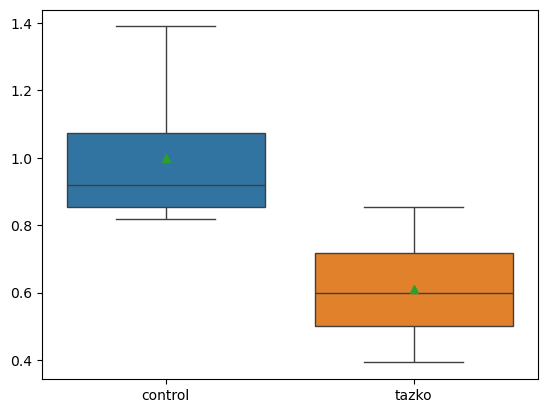

In [40]:
sns.boxplot(data=mtt_data,
            showmeans=True
           )

It might be hard to see, but you can see a green triangle representing the mean value for each of our two groups. However, we want our mean to be a horizontal line, so we adjust this with the next parameter.

<h3>Create a horizontal line</h3>

<Axes: >

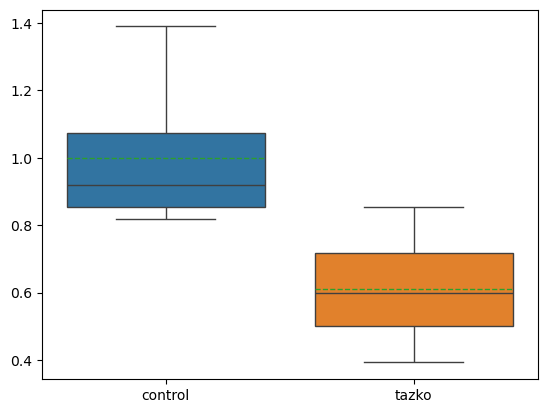

In [41]:
sns.boxplot(data=mtt_data,
            showmeans=True,
            meanline=True
           )

This is probably still hard to see, but there is now a green dashed line that denotes where our mean values are. It spans the full width of the box, but we can shorten the length of the line by reducing the width of our boxes.

<h3>Shorten the length of the mean line</h3>

<Axes: >

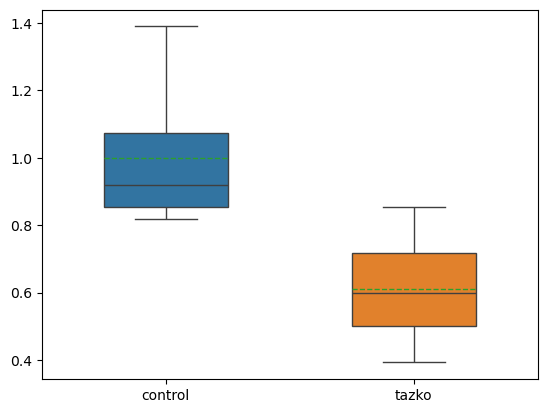

In [42]:
sns.boxplot(data=mtt_data,
            showmeans=True,
            meanline=True,
            width=0.5
           )

<h3>Refine the mean line</h3>

<Axes: >

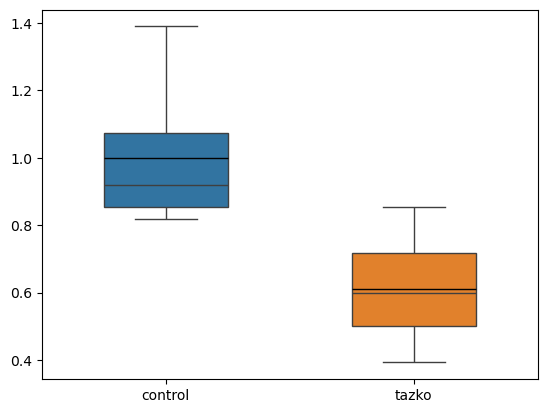

In [43]:
sns.boxplot(data=mtt_data,
            showmeans=True,
            meanline=True,
            width=0.5,
            meanprops={'linewidth': 1,
                       'color': 'k',
                       'linestyle': '-'
                      }
           )

Now the mean line is more clearly depicted, but there are still other parts of the box-and-whisker plot that we don't want.

<h3>Remove the median line</h3>

<Axes: >

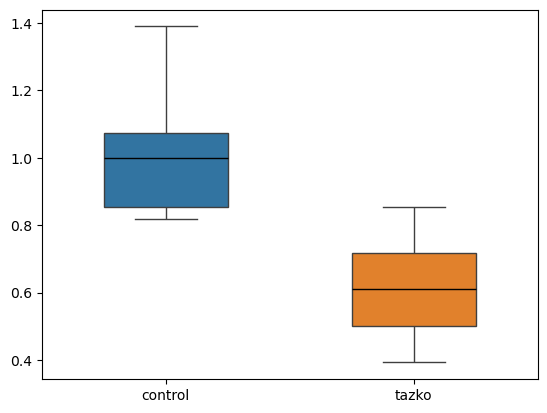

In [44]:
sns.boxplot(data=mtt_data,
            showmeans=True,
            meanline=True,
            width=0.5,
            meanprops={'linewidth': 1,
                       'color': 'k',
                       'linestyle': '-'
                      },
            medianprops={'visible': False}
           )

Now that we've removed the median line, we can clearly see the mean line since that's the remaining black line in the box.

<h3>Remove whiskers</h3>

<Axes: >

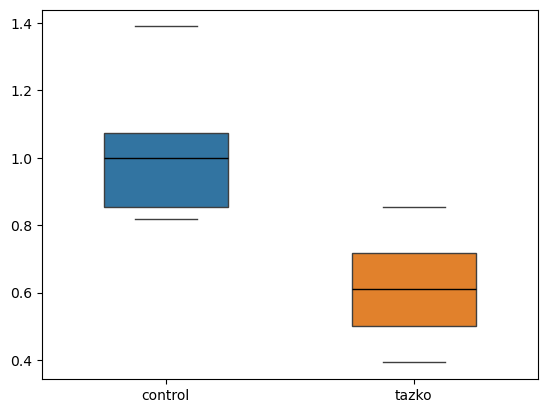

In [45]:
sns.boxplot(data=mtt_data,
            showmeans=True,
            meanline=True,
            width=0.5,
            meanprops={'linewidth': 1,
                       'color': 'k',
                       'linestyle': '-'
                      },
            medianprops={'visible': False},
            whiskerprops={'visible': False}
           )

<h3>Remove outliers (fliers)</h3>

A small thing to note is that in this step, we're not removing outliers from our dataset, we're only hiding them in the box-and-whisker plot since we don't need them for our visualization.

<Axes: >

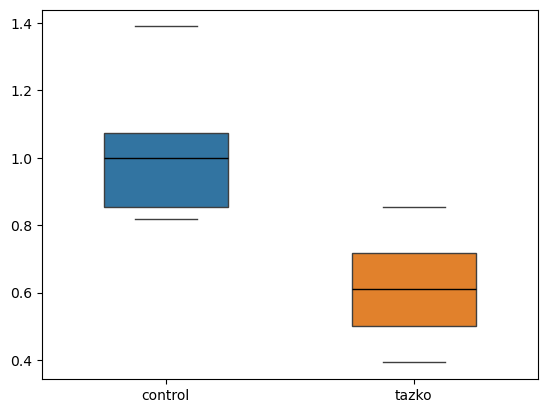

In [46]:
sns.boxplot(data=mtt_data,
            showmeans=True,
            meanline=True,
            width=0.5,
            meanprops={'linewidth': 1,
                       'color': 'k',
                       'linestyle': '-'
                      },
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            showfliers=False
           )

You can see at least for this dataset that nothing has changed. This is because we don't have any notable outliers in our dataset.

<h3>Remove the box</h3>

<Axes: >

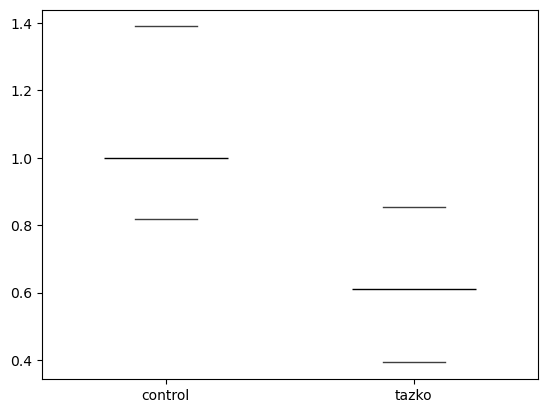

In [47]:
sns.boxplot(data=mtt_data,
            showmeans=True,
            meanline=True,
            width=0.5,
            meanprops={'linewidth': 1,
                       'color': 'k',
                       'linestyle': '-'
                      },
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            showfliers=False,
            showbox=False
           )

<h3>Remove the caps</h3>

<Axes: >

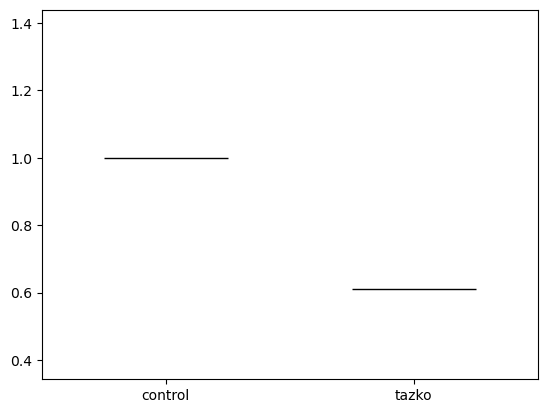

In [48]:
sns.boxplot(data=mtt_data,
            showmeans=True,
            meanline=True,
            width=0.5,
            meanprops={'linewidth': 1,
                       'color': 'k',
                       'linestyle': '-'
                      },
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            showfliers=False,
            showbox=False,
            showcaps=False
           )

<h3>Look at all three of our plots side by side</h3>

Let's now take a look at all three of our plots side by side by plotting them as subplots on a single figure. We can do this by making use of <code>plt.subplots()</code> and specifying how many subplots we want to be plotted. This way, instead of a single plot, we can have multiple plots generated side by side.

<Axes: >

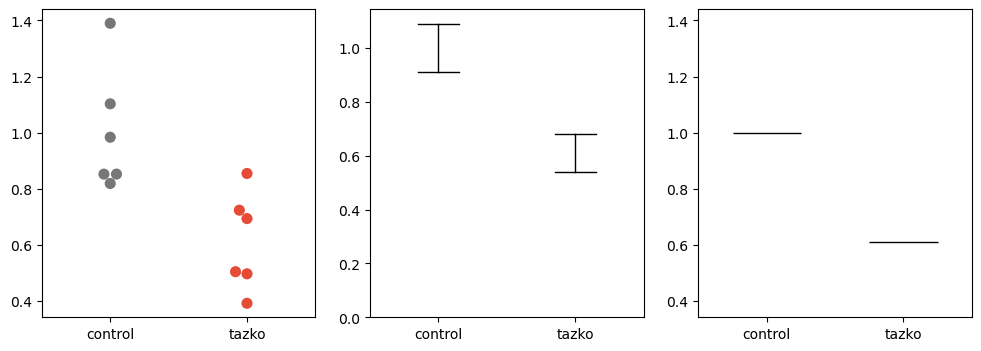

In [49]:
fig, ax = plt.subplots(1,3, figsize=(12, 4))

sns.swarmplot(data=mtt_data,
              s=8,
              palette=dot_colors,
              ax=ax[0]
             )

sns.barplot(data=mtt_data,
            estimator=np.mean,
            alpha=0,
            errorbar='se',
            capsize=0.3,
            err_kws={'linewidth': 1,
                     'color': 'k'},
            ax=ax[1]
           )

sns.boxplot(data=mtt_data,
            showmeans=True,
            meanline=True,
            width=0.5,
            meanprops={'linewidth': 1,
                       'color': 'k',
                       'linestyle': '-'
                      },
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax[2]
           )

<h3>Now let's overlay all our plots</h3>

<Axes: >

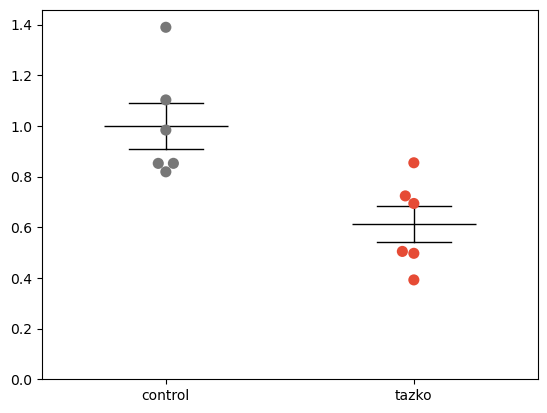

In [50]:
fig, ax = plt.subplots()

sns.swarmplot(data=mtt_data,
              s=8,
              palette=dot_colors
             )

sns.barplot(data=mtt_data,
            estimator=np.mean,
            alpha=0,
            errorbar='se',
            capsize=0.3,
            err_kws={'linewidth': 1,
                     'color': 'k'}
           )

sns.boxplot(data=mtt_data,
            showmeans=True,
            meanline=True,
            width=0.5,
            meanprops={'linewidth': 1,
                       'color': 'k',
                       'linestyle': '-'
                      },
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            showfliers=False,
            showbox=False,
            showcaps=False
           )

<h3>Re-order the sequence that plots are overlaid</h3>

You can see that our swarmplot is overlaid on top of our descriptive statistics, so we need to change the order in which each plot appears, so that our descriptive statistics are on top. We can do this by passing a <code>zorder</code> parameter to our swarmplot to move it under everything else.

<Axes: >

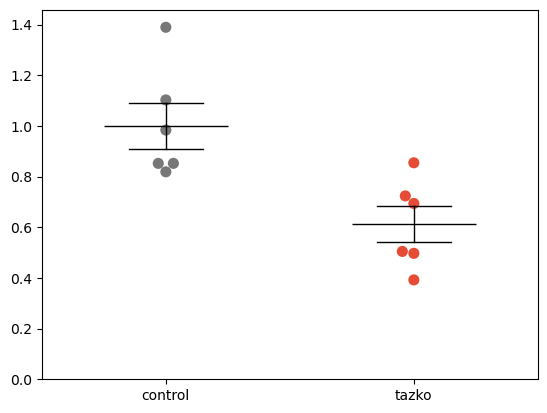

In [52]:
fig, ax = plt.subplots()

sns.swarmplot(data=mtt_data,
              s=8,
              palette=dot_colors,
              zorder=0
             )

sns.barplot(data=mtt_data,
            estimator=np.mean,
            alpha=0,
            errorbar='se',
            capsize=0.3,
            err_kws={'linewidth': 1,
                     'color': 'k'}
           )

sns.boxplot(data=mtt_data,
            showmeans=True,
            meanline=True,
            width=0.5,
            meanprops={'linewidth': 1,
                       'color': 'k',
                       'linestyle': '-'
                      },
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            showfliers=False,
            showbox=False,
            showcaps=False
           )

<h2>Fine tune our figure</h2>

Now our plot is looking much nicer and more like a publication quality figure. However, we still need to update the labels and axis titles.

Since our plot set up is slightly different, we'll pull from slightly different attributes to define what our titles and axes labels will be. The concept is still the same as before, but the exact attribute we're calling is different.

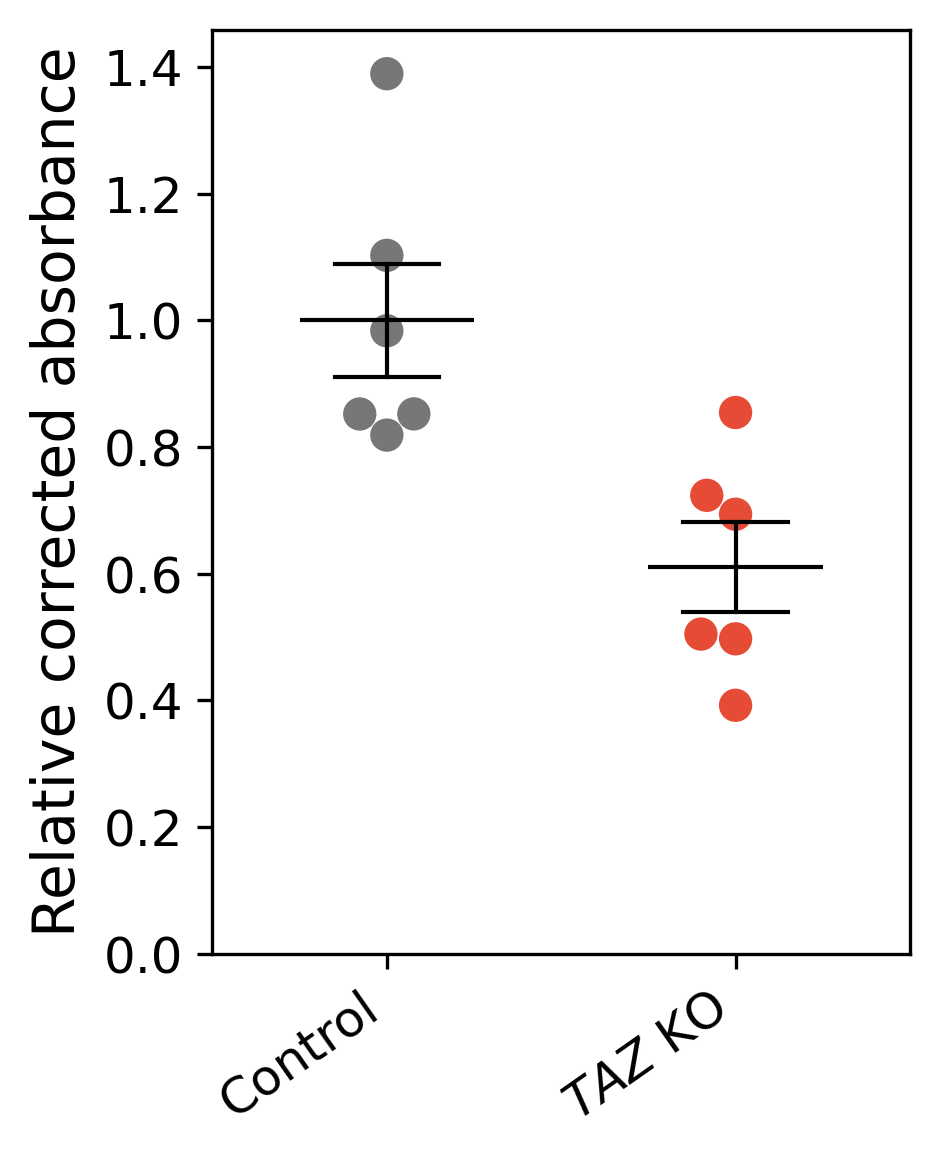

In [56]:
fig, ax = plt.subplots()

sns.swarmplot(data=mtt_data,
              s=8,
              palette=dot_colors,
              zorder=0
             )

sns.barplot(data=mtt_data,
            estimator=np.mean,
            alpha=0,
            errorbar='se',
            capsize=0.3,
            err_kws={'linewidth': 1,
                     'color': 'k'}
           )

sns.boxplot(data=mtt_data,
            showmeans=True,
            meanline=True,
            width=0.5,
            meanprops={'linewidth': 1,
                       'color': 'k',
                       'linestyle': '-'
                      },
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            showfliers=False,
            showbox=False,
            showcaps=False
           )

ax.set_ylabel('Relative corrected absorbance',
              size=14
             )

ax.set_xticks([0,1],
              ['Control', '$TAZ$ KO'],
              rotation=35,
              ha='right',
              size=12
             )
plt.yticks(size=12)

fig.set_size_inches(3, 4)
fig.set_dpi(300)
plt.show()

<h2>Despine</h2>

One of the benefits of using <code>seaborn</code> is that we can in a single line remove the spines of our plots.

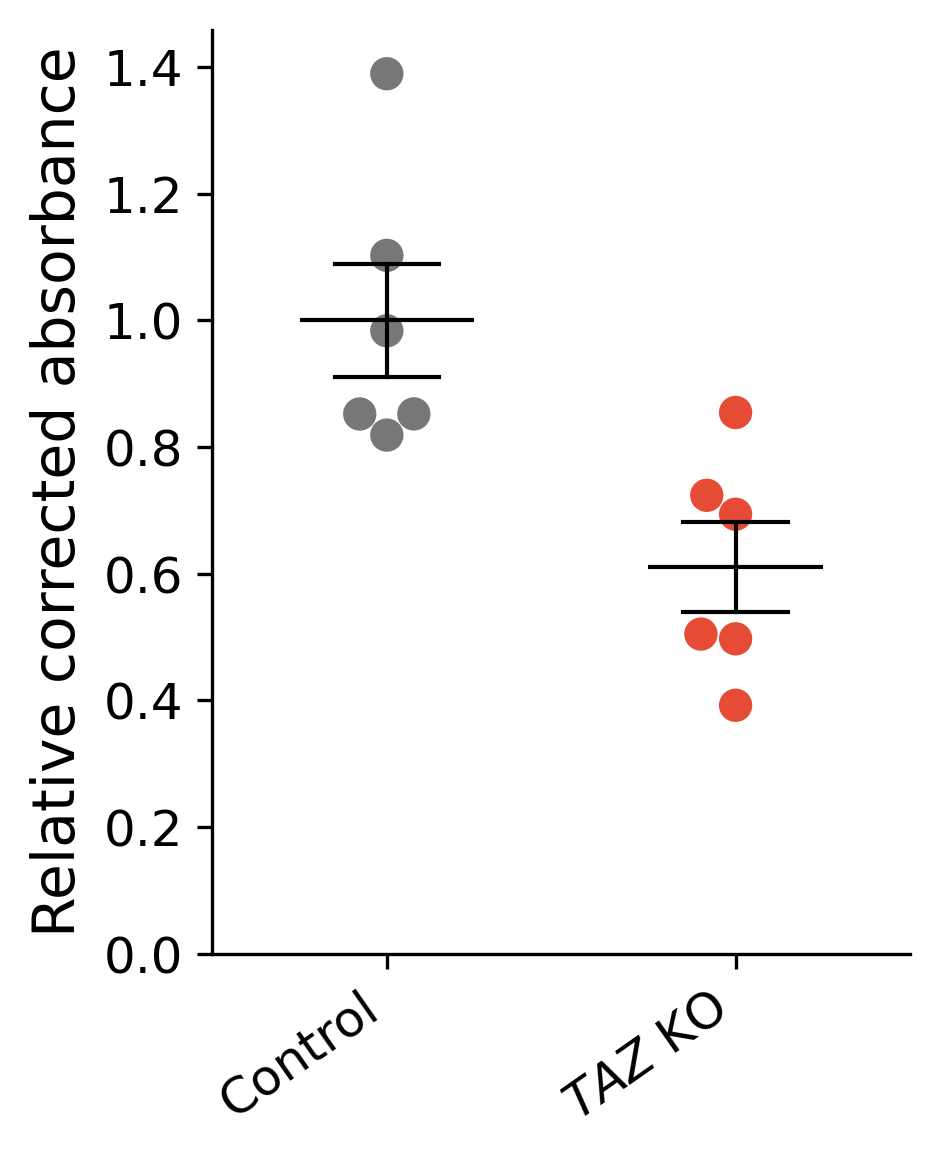

In [57]:
fig, ax = plt.subplots()

sns.swarmplot(data=mtt_data,
              s=8,
              palette=dot_colors,
              zorder=0
             )

sns.barplot(data=mtt_data,
            estimator=np.mean,
            alpha=0,
            errorbar='se',
            capsize=0.3,
            err_kws={'linewidth': 1,
                     'color': 'k'}
           )

sns.boxplot(data=mtt_data,
            showmeans=True,
            meanline=True,
            width=0.5,
            meanprops={'linewidth': 1,
                       'color': 'k',
                       'linestyle': '-'
                      },
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            showfliers=False,
            showbox=False,
            showcaps=False
           )

ax.set_ylabel('Relative corrected absorbance',
              size=14
             )

ax.set_xticks([0,1],
              ['Control', '$TAZ$ KO'],
              rotation=35,
              ha='right',
              size=12
             )
plt.yticks(size=12)

fig.set_size_inches(3, 4)
fig.set_dpi(300)

sns.despine()
plt.show()

<h2>Export your plot</h2>

Let's export our plot now that we have our nice publication quality figure.

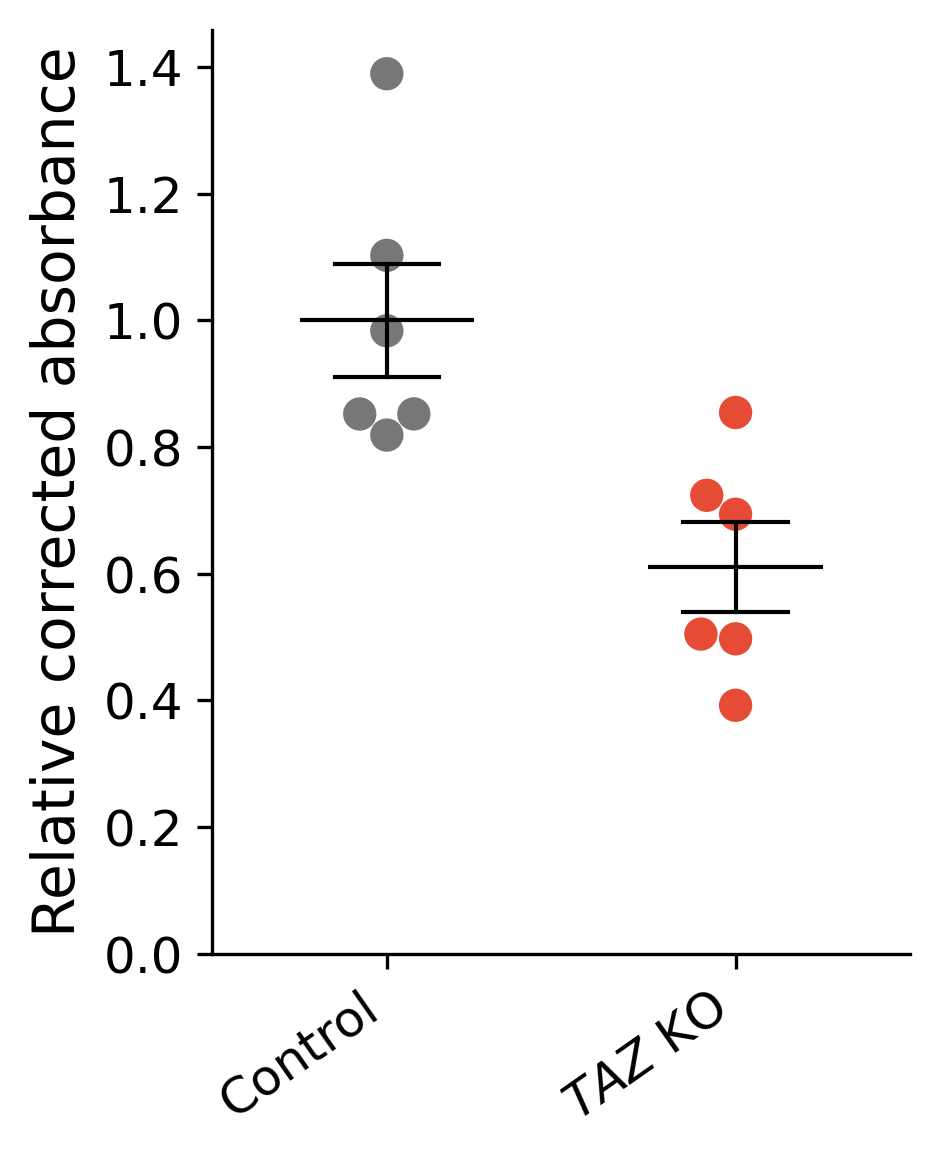

In [63]:
fig, ax = plt.subplots()

sns.swarmplot(data=mtt_data,
              s=8,
              palette=dot_colors,
              zorder=0
             )

sns.barplot(data=mtt_data,
            estimator=np.mean,
            alpha=0,
            errorbar='se',
            capsize=0.3,
            err_kws={'linewidth': 1,
                     'color': 'k'}
           )

sns.boxplot(data=mtt_data,
            showmeans=True,
            meanline=True,
            width=0.5,
            meanprops={'linewidth': 1,
                       'color': 'k',
                       'linestyle': '-'
                      },
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            showfliers=False,
            showbox=False,
            showcaps=False
           )

ax.set_ylabel('Relative corrected absorbance',
              size=14
             )

ax.set_xticks([0,1],
              ['Control', '$TAZ$ KO'],
              rotation=35,
              ha='right',
              size=12
             )
plt.yticks(size=12)

fig.set_size_inches(3, 4)
fig.set_dpi(300)

sns.despine()
plt.show()

fig.savefig('../figures/mtt_data_plot.pdf', bbox_inches='tight')

In [58]:
os.getcwd()

'/home/jovyan/MCB201B_F2025/Week_1/cdc_covid'